# A. La régression lineaire

#I. Introduction
##II. Régression lineaire simple
Soit un ensemble de points $ \{ (x_{i},y_{i}) \in R^{2}  i=1...n \}$.
Trouver une fonction $h$ telle que $$h(x_{i}) \approx y_{i} \forall i \in \{1 ... n\}$$

### Q1. Ecrire un script qui permet d'obtenir le nuage de point suivant:
Remarque: On remaque qu'il y a une correlation entre x et y dans cette figure.

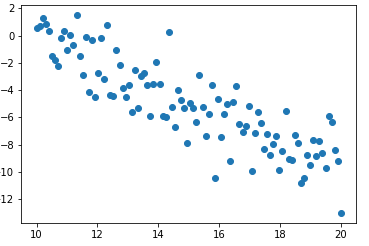

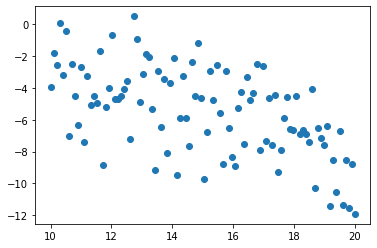

In [5]:
# Votre code ici
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10,20,100)
y = -0.5*x + ((np.random.randn(100) * 2.25) +2)

plt.scatter(x,y)
plt.show()

Q2. Soit $h(x)=w_{0}+ w_{1}x$. Sur la meme figure, tracez h(x) pour differentes valeurs des coeficients  $w_{0}$ et $w_{1}$ et calculez la valeur de la fonction objective (coût) suivante:
$$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} $$

Que remarquez-vous?


fonction de cout_h1 =  0.04228381662550214
fonction de cout_h2 =  4.397939026103469
fonction de cout_h3 =  0.04647072968698824
-------------------------------
fonction de cout_h1 < fonction de cout_h3 < fonction de cout_h2


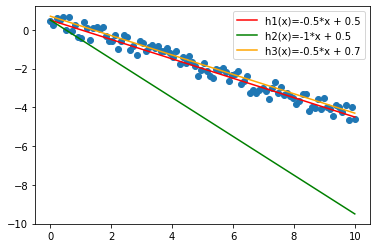

In [6]:
#Votre code ici
##########################################################################
x = np.linspace(0,10,100)
y = -0.5*x + np.random.random(100)

#h1(x)
w1_h1 = -0.5 ; w0_h1 = 0.5
h1 = w1_h1*x + w0_h1
#h2(x)
w1_h2 = -1 ; w0_h2 = 0.5
h2 = w1_h2*x + w0_h2
#h3(x)
w1_h3 = -0.5 ; w0_h3 = 0.7
h3 = w1_h3*x + w0_h3

'''calculons la fonction de cout '''
def J(h):
    return (1/(2*100)) * ((h-y).dot(h-y))

print('fonction de cout_h1 = ',J(h1))
print("fonction de cout_h2 = ",J(h2))
print("fonction de cout_h3 = ",J(h3))
print("-------------------------------")
print("fonction de cout_h1 < fonction de cout_h3 < fonction de cout_h2")

plt.scatter(x,y)

plt.plot(x , h1 , color="red",   label = "h1(x)=-0.5*x + 0.5")
plt.plot(x , h2 , color="green", label = "h2(x)=-1*x + 0.5")
plt.plot(x , h3 , color="orange",  label = "h3(x)=-0.5*x + 0.7")

plt.legend()
plt.show()

Q3. Pour minimiser le coût $$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(w_{0},w_{1})$ par rapport à $w_{0}$ et par rapport à $w_{1}$ nous avons alors:
$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{0}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{1}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})x_{i} $$
A chaque itération, la mise à jour des coeficients sera comme suivant:
$$ w_{0}\leftarrow w_{0}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{0}}$$
$$ w_{1}\leftarrow w_{1}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{1}}$$

$\alpha$: learning rate

a. Ecrire un script pour cet algorithme.

b. Tracer l'evolution de ${J(w_{0},w_{1})}$ au cours des itération de la descente du gradient pour differentes valeur de $\alpha$.

c. Que remarquez-vous

d. Visulisez la solution obtenue

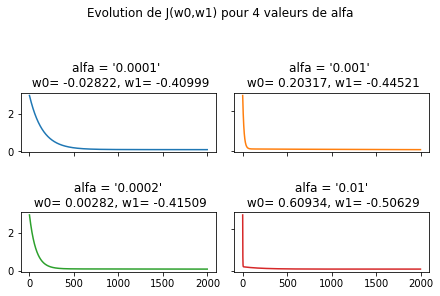

In [7]:
# votre code ici
import random
#a. Ecrire un script pour cet algorithme
nbr_iterations = 2000

def derivee_partielle(h):
    derivee_par_rapport_a_w0 = (1/100)*(sum(h-y))
    derivee_par_rapport_a_w1 = (1/100)*(sum((h-y)*x))
    return [derivee_par_rapport_a_w0 , derivee_par_rapport_a_w1]
 
def gradient_descent(learning_rate):
    w0 = 0
    w1 = 0
    xx = []
    yy = []
    for i in range(nbr_iterations):
        h = w1 * x + w0
        [d_w0 , d_w1] = derivee_partielle(h)
        [new_w0 , new_w1] = [w0 - (learning_rate * d_w0) , w1 - (learning_rate * d_w1)]
        w0 = new_w0
        w1 = new_w1
        xx.append(i)
        yy.append(J(w1*x+w0))
    return [w0 , w1 , xx , yy]
#b. Tracer l'evolution de  𝐽(𝑤0,𝑤1)  au cours des itération de la 
#descente du gradient pour differentes valeur de 𝛼 .

[w0,w1,xx,yy] = gradient_descent(0.0001)
figure , axs = plt.subplots(2,2,constrained_layout=True)
figure.suptitle('Evolution de J(w0,w1) pour 4 valeurs de alfa\n\n')
axs[0,0].plot(xx,yy)
axs[0,0].set_title("alfa = '0.0001' \n w0= {0}, w1= {1}".format(round(w0,5),round(w1,5)))
[w0,w1,xx,yy] = gradient_descent(0.001)
axs[0,1].plot(xx, yy, 'tab:orange')
axs[0,1].set_title("alfa = '0.001' \n w0= {0}, w1= {1}".format(round(w0,5),round(w1,5)))
[w0,w1,xx,yy] = gradient_descent(0.0002)
axs[1,0].plot(xx, yy, 'tab:green')
axs[1,0].set_title("\n alfa = '0.0002' \n w0= {0}, w1= {1}".format(round(w0,5),round(w1,5)))
[w0,w1,xx,yy] = gradient_descent(0.01)
axs[1,1].plot(xx, yy, 'tab:red')
axs[1,1].set_title("\n alfa = '0.01' \n w0= {0}, w1= {1}".format(round(w0,5),round(w1,5)))

for ax in axs.flat:
    ax.label_outer()

Q4. Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$ w_{1}=\frac{\sum_{i=0}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=0}^{m}(x_{i}-\overline{x})^2} $$

$$w_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x

a. Ecrire un script qui calcule les valeur de $w_{0}$ et $w_{1}$

b. Visualiser les resultats

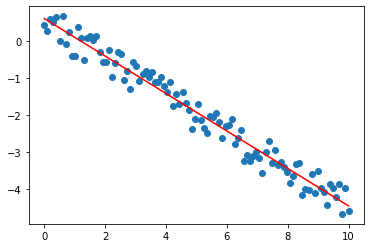

In [8]:
#Votre code ici
#a
w1 = ( (x-x.mean()).dot(y-y.mean()) ) / ( (x-x.mean()).dot(x-x.mean()) )
w0 = ( y.mean() )- ( w1*(x.mean()) )

#b
plt.scatter(x,y)
plt.plot(x,w1*x+w0 , color='red')

# III-Régression lineaire multiple
Dans ce cas $x=(x_{0}, x_{1},...,x_{n})\in \Re^{n}$ la fonction hypothèse $h(x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$

### Refaire les mêmes étapes pour n=2

### nuage de points

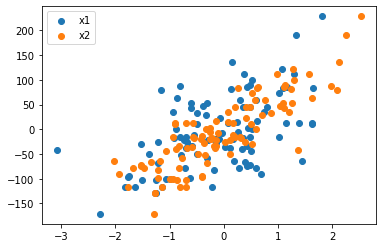

In [9]:
import numpy as np
from sklearn.datasets import make_regression

x , y = make_regression(n_samples = 100 , n_features=2)
#redimensionner y
y = y.reshape(y.shape[0],1)
plt.scatter(x[:,0],y, label="x1")
plt.scatter(x[:,1],y, label="x2")
plt.legend()

In [10]:
#creation d'une matrice X de taille (100,3) des vecteurs X1,X2,biais
X = np.hstack((x , np.ones((x.shape[0],1))))
print(X.shape)
print(X[0:10])

(100, 3)
[[-1.81486991 -0.69196181  1.        ]
 [-0.98739959 -0.99172174  1.        ]
 [-1.06100361 -0.92767711  1.        ]
 [ 0.35642744 -0.54310495  1.        ]
 [ 0.1960152  -1.16869431  1.        ]
 [-1.74140544 -0.39966948  1.        ]
 [ 1.14886329 -0.56012454  1.        ]
 [ 0.80342305  0.2176069   1.        ]
 [ 1.3369967   2.25121067  1.        ]
 [-0.81167029  0.29176221  1.        ]]


In [11]:
#initialisons le vecteur theta aleatoirement
theta = np.random.randn(3,1)
theta

array([[-0.92059037],
       [ 0.98757587],
       [ 0.43212215]])

In [12]:
def h(X , theta):
    return X.dot(theta)

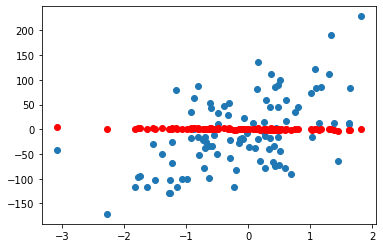

In [13]:
plt.scatter(x[:,0] , y)
plt.scatter(x[:,0] , h(X,theta) , color='red')

In [14]:
#fonction de cout
def J(X , y , theta):
    m = len(y)
    return 1/(2*m) * np.sum((h(X,theta) - y)**2)

In [15]:
#Avant d'appliquer le gradient descent (erreur trop grand)
J(X,y,theta)

2638.760350708324

In [16]:
#gradient (derivee partielle)
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(h(X , theta) - y)

In [17]:
#retourner theta et un tableau de cout dans chaque iteration
def gradient_descent(X , y , theta , alfa , n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - (alfa * grad(X , y, theta))
        cost_history[i] = J(X , y, theta)
    return theta , cost_history    

In [18]:
#Training
n_iterations = 2000
alfa = 0.01

theta_final , cost_history =gradient_descent(X,y,theta,alfa,n_iterations)
theta_final

array([[ 4.06951414e+01],
       [ 6.09534997e+01],
       [-1.60864398e-06]])

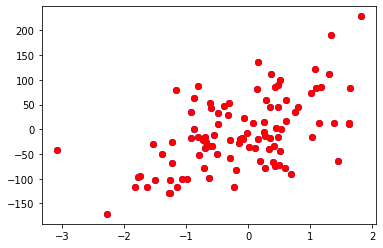

In [19]:
#vecteur de predictions
pred = h(X , theta_final)

#resultats de predictions en rouge par rapport au variable x1(en bleu)
plt.scatter(x[:,0] , y , c='blue')
plt.scatter(x[:,0] , pred , c='red')


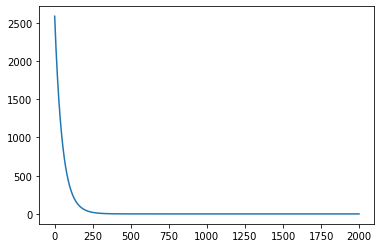

In [20]:
#l'evolution de J
plt.plot(range(n_iterations) , cost_history)

<IPython.core.display.Javascript object>


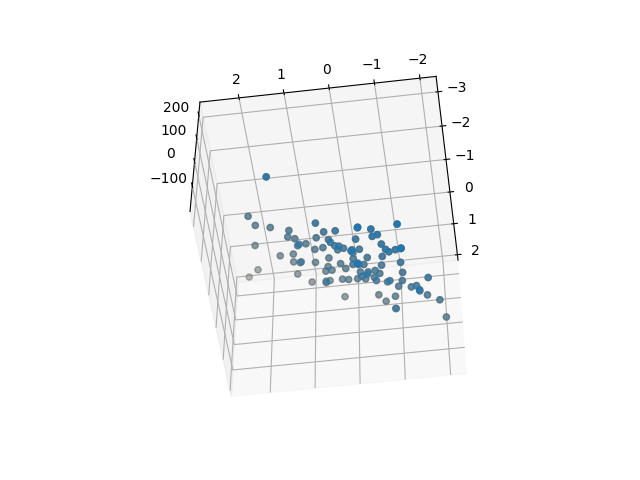

In [23]:
#visualisation en 3 dimansions
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111 , projection="3d")
ax.scatter(x[:,0] , x[:,1] , y)
ax.scatter(x[:,0] , x[:,1] , pred)
